In [23]:
import pandas as pd
import json
from tqdm import tqdm
from collections import Counter

In [34]:
file_path = 'dataset_coco.json'
with open(file_path, 'r') as f:
    data = json.load(f)

In [35]:
file_names = []
splits = []
captions = []
tokens = []
tok_len = []
word_freq = Counter()
max_len = 100

for img in tqdm(data['images'], position=0):
    for sent in img['sentences']:
        file_names.append(img['filename'])
        captions.append(sent['raw'])
        splits.append(img['split'])
        
        ## tokens
        if len(sent['tokens']) <= max_len:
            tokens.append(sent['tokens'])
            tok_len.append(len(sent['tokens']))

100%|██████████| 123287/123287 [00:00<00:00, 246969.10it/s]


In [36]:
len(tok_len)

616767

In [37]:
df = pd.DataFrame({
    'file_name': file_names,
    'split': splits,
    'caption': captions,
    'tok_len': tok_len,
    'tokens': tokens
})

In [38]:
df.head()

,file_name,split,caption,tok_len,tokens
0,COCO_val2014_000000391895.jpg,test,A man with a red helmet on a small moped on a ...,14,"[a, man, with, a, red, helmet, on, a, small, m..."
1,COCO_val2014_000000391895.jpg,test,Man riding a motor bike on a dirt road on the ...,12,"[man, riding, a, motor, bike, on, a, dirt, roa..."
2,COCO_val2014_000000391895.jpg,test,A man riding on the back of a motorcycle.,9,"[a, man, riding, on, the, back, of, a, motorcy..."
3,COCO_val2014_000000391895.jpg,test,A dirt path with a young person on a motor bik...,29,"[a, dirt, path, with, a, young, person, on, a,..."
4,COCO_val2014_000000391895.jpg,test,A man in a red shirt and a red hat is on a mot...,18,"[a, man, in, a, red, shirt, and, a, red, hat, ..."


<AxesSubplot:>

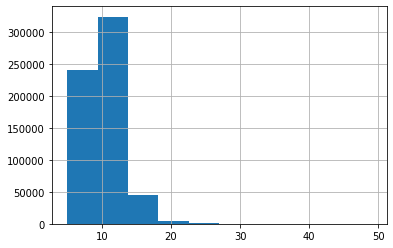

In [39]:
df.tok_len.hist()

In [40]:
df.tok_len.max()

49

In [41]:
df.to_json("coco.json")

In [52]:
df = pd.read_json("data30.json")
df.head(10)

,file_name,split,caption,tok_len,tokens
0,1000092795.jpg,train,Two young guys with shaggy hair look at their ...,16,"[two, young, guys, with, shaggy, hair, look, a..."
1,1000092795.jpg,train,"Two young, White males are outside near many b...",9,"[two, young, white, males, are, outside, near,..."
2,1000092795.jpg,train,Two men in green shirts are standing in a yard.,10,"[two, men, in, green, shirts, are, standing, i..."
3,1000092795.jpg,train,A man in a blue shirt standing in a garden.,10,"[a, man, in, a, blue, shirt, standing, in, a, ..."
4,1000092795.jpg,train,Two friends enjoy time spent together.,6,"[two, friends, enjoy, time, spent, together]"
5,10002456.jpg,train,Several men in hard hats are operating a giant...,11,"[several, men, in, hard, hats, are, operating,..."
6,10002456.jpg,train,Workers look down from up above on a piece of ...,11,"[workers, look, down, from, up, above, on, a, ..."
7,10002456.jpg,train,Two men working on a machine wearing hard hats.,9,"[two, men, working, on, a, machine, wearing, h..."
8,10002456.jpg,train,Four men on top of a tall structure.,8,"[four, men, on, top, of, a, tall, structure]"
9,10002456.jpg,train,Three men on a large rig.,6,"[three, men, on, a, large, rig]"


In [53]:
df.tok_len.max(), df.tok_len.min()

(78, 2)

<AxesSubplot:>

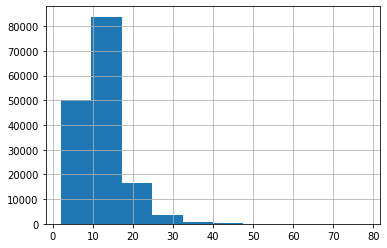

In [54]:
df.tok_len.hist()

In [55]:
df.iloc[0,:]['caption']

'Two young guys with shaggy hair look at their hands while hanging out in the yard.'

In [56]:
df.iloc[0,:]['tokens']

['two',
 'young',
 'guys',
 'with',
 'shaggy',
 'hair',
 'look',
 'at',
 'their',
 'hands',
 'while',
 'hanging',
 'out',
 'in',
 'the',
 'yard']

In [13]:
build_vocab('data30.json')

100%|██████████| 145000/145000 [00:00<00:00, 323220.39it/s]
